In [1]:
import tensorflow as tf

In [2]:
import re
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from matplotlib import pyplot as plt
print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE


Tensorflow version 2.14.0


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential, Model
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras import layers, models
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [4]:
import PIL.Image as Image

In [5]:
from keras.preprocessing import image

In [6]:
import pathlib
data_path = "D:/CS/Projects/Plant Disease Detection/new-plant-diseases-dataset"

train_path =  "D:/CS/Projects/Plant Disease Detection/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
#train_path = pathlib.Path(train_path)
valid_path = "D:/CS/Projects/Plant Disease Detection/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
#valid_path= pathlib.Path(valid_path)
test_path = "D:/CS/Projects/Plant Disease Detection/new-plant-diseases-dataset/test"
#test_path= pathlib.Path(test_path)

In [7]:
""""base_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)"
train_data = os.path.join(base_dir,"train")
#test_path= os.path.join(base_dir,"valid")"""

'"base_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)"\ntrain_data = os.path.join(base_dir,"train")\n#test_path= os.path.join(base_dir,"valid")'

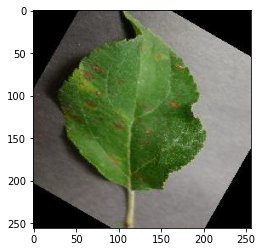

In [8]:
import matplotlib.image as Mimg
img = Mimg.imread('D:/CS/Projects/Plant Disease Detection/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust/0321e067-d13b-47d0-b3a6-76ba6f357d02___FREC_C.Rust 3667_new30degFlipLR.JPG')
plt.imshow(img)
plt.show()

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "D:/CS/Projects/Plant Disease Detection/new-plant-diseases-dataset",
    seed=123,
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)


Found 87900 files belonging to 2 classes.


In [10]:
from PIL import Image
image = Image.open('D:/CS/Projects/Plant Disease Detection/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Esca_(Black_Measles)/00c247e8-48d2-4a56-a9f3-4eacfb4d85be___FAM_B.Msls 4197.JPG')
 
print(image.format)
print(image.size)
print(image.mode)

JPEG
(256, 256)
RGB


In [11]:
data_dir = "D:/CS/Projects/Plant Disease Detection/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)"
import pathlib
data_dir = pathlib.Path(data_dir)

In [12]:
filepaths = list(data_dir.glob(r'**/*.JPG'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))


filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

dataframe = pd.concat([filepaths, labels], axis=1)

In [13]:
dataframe

Filepath  \
0      D:\CS\Projects\Plant Disease Detection\new-pla...   
1      D:\CS\Projects\Plant Disease Detection\new-pla...   
2      D:\CS\Projects\Plant Disease Detection\new-pla...   
3      D:\CS\Projects\Plant Disease Detection\new-pla...   
4      D:\CS\Projects\Plant Disease Detection\new-pla...   
...                                                  ...   
87862  D:\CS\Projects\Plant Disease Detection\new-pla...   
87863  D:\CS\Projects\Plant Disease Detection\new-pla...   
87864  D:\CS\Projects\Plant Disease Detection\new-pla...   
87865  D:\CS\Projects\Plant Disease Detection\new-pla...   
87866  D:\CS\Projects\Plant Disease Detection\new-pla...   

                                        Label  
0                          Apple___Apple_scab  
1                          Apple___Apple_scab  
2                          Apple___Apple_scab  
3                          Apple___Apple_scab  
4                          Apple___Apple_scab  
...                                       ...  
87862  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
87863  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
87864  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
87865  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
87866  Tomato___Tomato_Yellow_Leaf_Curl_Virus  

[87867 rows x 2 columns]

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
import pathlib
test_data = pathlib.Path("/kaggle/input/new-plant-diseases-dataset/test")

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.08)

validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_path,
                                               target_size = (256,256),
                                               batch_size = 32,
                                               shuffle = True,
                                               class_mode = "categorical",
                                             subset='training')

valid_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size = (256,256),
                                                    batch_size = 32,
                                                    shuffle = True,
                                                    class_mode = "categorical",
                                                    subset='validation')

test_generator = validation_datagen.flow_from_directory(valid_path,
                                                        batch_size=32,
                                                        shuffle = False,
                                                        class_mode='categorical',
                                                        target_size=(256,256))

Found 64689 images belonging to 38 classes.
Found 5606 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


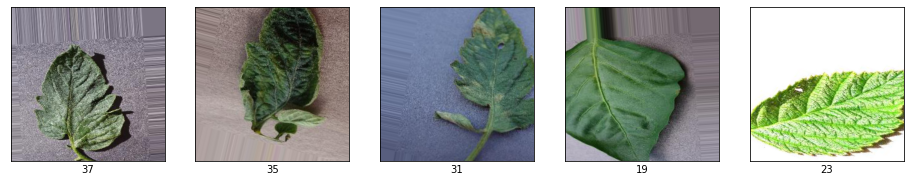

In [17]:
from tensorflow.keras.preprocessing import image
sample_x, sample_y = next(train_generator)
plt.figure(figsize=(16,9))
for i in range(5):
    plt.subplot(1,5,i+1)
    img = image.img_to_array(sample_x[i])
    plt.imshow(img)
    plt.xlabel(np.argmax(sample_y[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [18]:
print(train_generator.class_indices)
#print(valid_generator.class_indices)
#print(test_generator.class_indices)


{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [19]:
print(train_generator.class_indices)
#print(valid_generator.class_indices)
#print(test_generator.class_indices)


{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained model
model = tf.keras.models.load_model('D:/CS/Projects/Plant Disease Detection/plant_disease_ResNet152V2.h5')

# Test accuracy is 97.74 %

In [21]:
L = [  'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',  'Tomato___healthy']

In [22]:
img='D:/CS/Projects/Plant Disease Detection/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG'

In [23]:
import cv2
import numpy as np

def predict_disease(test_image):
    img = cv2.imread(test_image)
    
    if img is not None:
        img = img / 255.0
        img = cv2.resize(img, (256, 256))
        img = img.reshape(1, 256, 256, 3)
        # Rest of your prediction code here
        prediction = model.predict(img)
        pred_class = np.argmax(prediction, axis=-1)
        return pred_class
    else:
        print("Error: Unable to read the image.")
        return None

# Example usage
pred = predict_disease(img)
if pred is not None:
    d = pred[0]
    L[d]
    # Continue with your code


1/1 [==============================] - 4s 4s/step


In [24]:
print(L[d])

Apple___Cedar_apple_rust


1/1 [==============================] - 0s 413ms/step


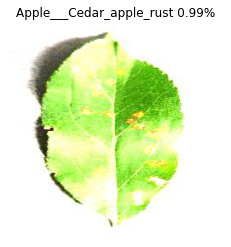

1/1 [==============================] - 1s 567ms/step


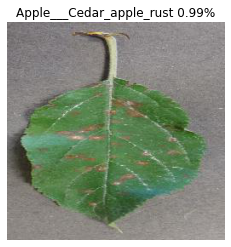

1/1 [==============================] - 0s 401ms/step


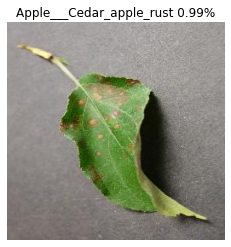

1/1 [==============================] - 0s 438ms/step


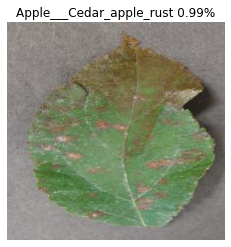

1/1 [==============================] - 0s 374ms/step


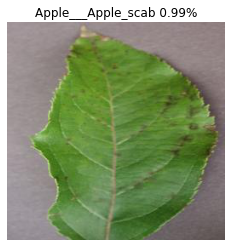

1/1 [==============================] - 0s 351ms/step


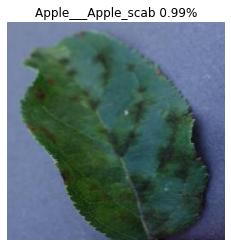

1/1 [==============================] - 0s 344ms/step


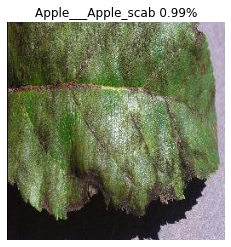

1/1 [==============================] - 0s 487ms/step


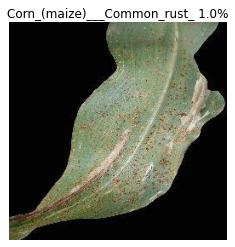

1/1 [==============================] - 0s 390ms/step


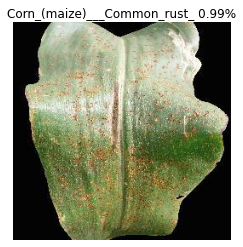

1/1 [==============================] - 0s 368ms/step


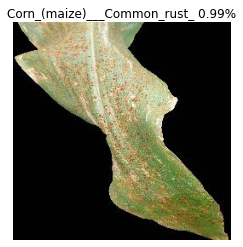

1/1 [==============================] - 0s 440ms/step


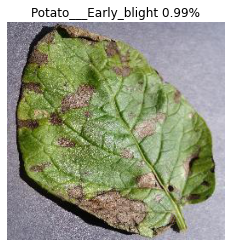

1/1 [==============================] - 0s 363ms/step


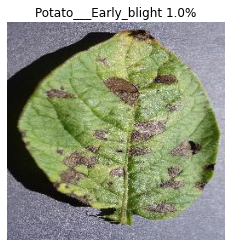

1/1 [==============================] - 0s 366ms/step


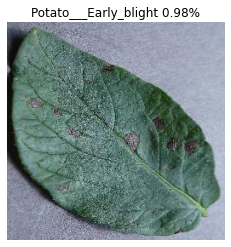

1/1 [==============================] - 0s 348ms/step


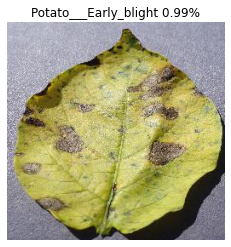

1/1 [==============================] - 0s 353ms/step


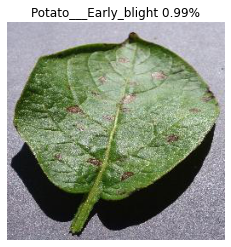

1/1 [==============================] - 0s 491ms/step


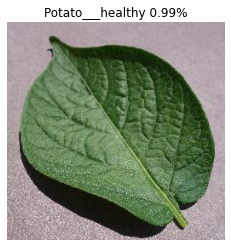

1/1 [==============================] - 0s 353ms/step


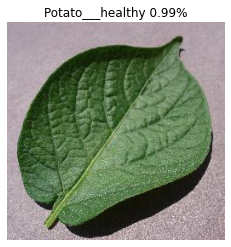

1/1 [==============================] - 0s 395ms/step


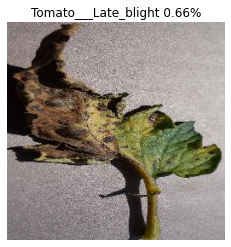

1/1 [==============================] - 0s 353ms/step


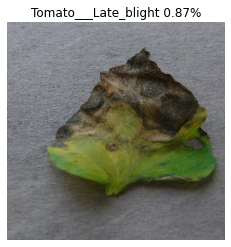

1/1 [==============================] - 0s 340ms/step


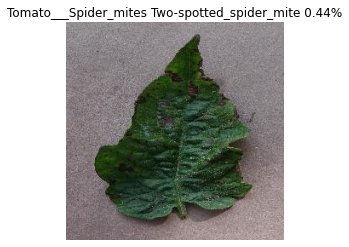

1/1 [==============================] - 0s 461ms/step


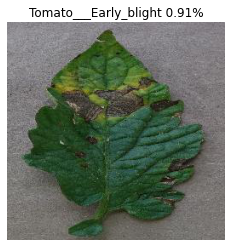

1/1 [==============================] - 0s 368ms/step


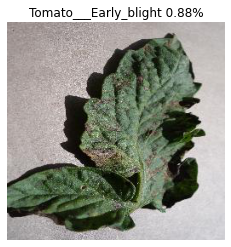

1/1 [==============================] - 0s 415ms/step


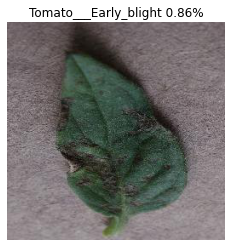

1/1 [==============================] - 0s 367ms/step


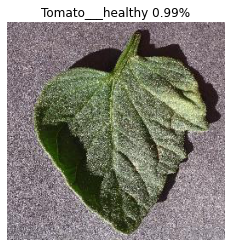

1/1 [==============================] - 0s 374ms/step


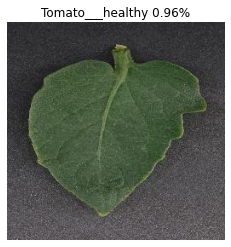

1/1 [==============================] - 0s 347ms/step


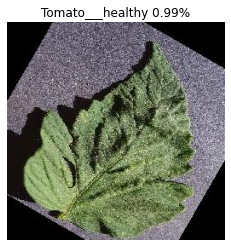

1/1 [==============================] - 0s 341ms/step


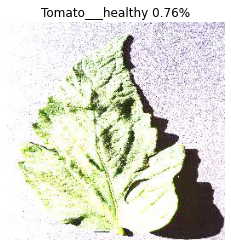

1/1 [==============================] - 0s 480ms/step


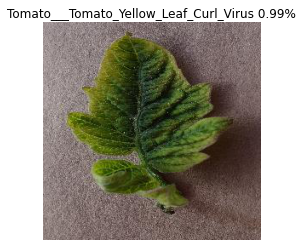

1/1 [==============================] - 0s 413ms/step


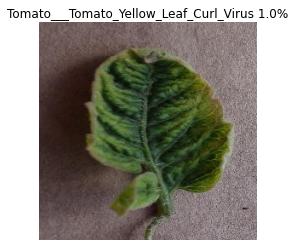

1/1 [==============================] - 0s 331ms/step


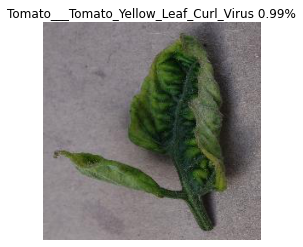

1/1 [==============================] - 0s 351ms/step


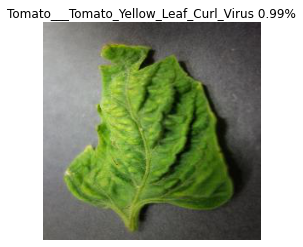

1/1 [==============================] - 0s 342ms/step


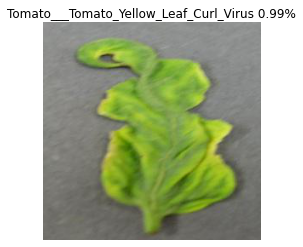

1/1 [==============================] - 0s 345ms/step


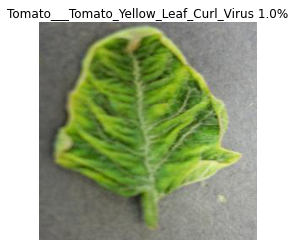

In [25]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
directory="D:/CS/Projects/Plant Disease Detection/new-plant-diseases-dataset/test/test"
files = [os.path.join(directory,p) for p in sorted(os.listdir(directory))]
for i in range(0,33):
    image_path = files[i]
    new_img =keras.utils.load_img(image_path, target_size=(256, 256))
    img = keras.utils.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    prediction = model.predict(img)
    probabilty = prediction.flatten()
    max_prob = probabilty.max()
    index=prediction.argmax(axis=-1)[0]
    class_name = L[index]
    #ploting image with predicted class name        
    plt.figure(figsize = (4,4))
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(class_name+" "+ str(max_prob)[0:4]+"%")
    plt.show()